In [55]:
import numpy as np 
import pandas as pd

In [56]:

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [57]:
data_set = pd.read_csv('C:/Users/saura/quora-insincere-questions-classification/data.csv')
data_set.shape

(1306122, 3)

In [58]:
print(data_set.head())

                    qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


<AxesSubplot: title={'center': 'Target distribution'}, ylabel='Frequency'>

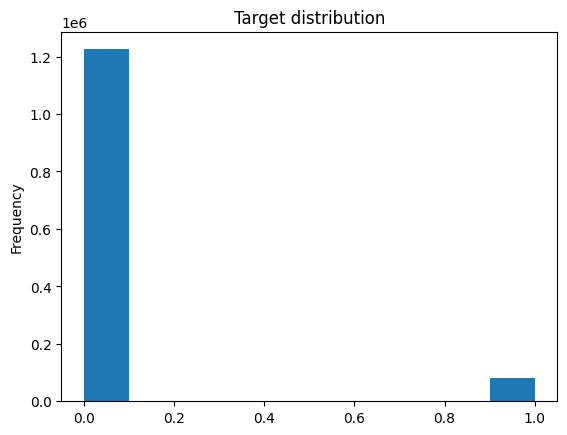

In [59]:
data_set['target'].plot(kind='hist',title='Target distribution')

In [60]:
from sklearn.model_selection  import train_test_split
# x,test_x,y,test_y = train_test_split(X,y,test_size=0.2)
train_set, remaining = train_test_split(data_set,random_state= 42,train_size=0.8,stratify = data_set.target.values)
test_set , _ = train_test_split(remaining,random_state= 42,train_size=0.99,stratify = remaining.target.values)
train_set.shape, remaining.shape, test_set.shape, _.shape

((1044897, 3), (261225, 3), (258612, 3), (2613, 3))

In [61]:
train_set.target.head(15).values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
train_set['question_text'].head(15).values

array(['Which is the best career after 12th?',
       'What are the role of thinking in human life and show how person life can be enfluenced positevely or negatively by his or her thinking pattern?',
       'Is strange that for most of the time I am happy to just be alone, walking outside and just thinking about things?',
       'If magic is real, should we allow people to teach and learn it?',
       'How effective is cognitive behavioral therapy for depression?',
       'What are the highlights of Union Budget 2018-19? Who got the major benefits?',
       'What are the top 5 gadgets I need to bring for street photography? I’ll be going to Tokyo next month. And I need some help with my gadgets and gears. I only have my iPhone 7plus with me. Any suggestions would be gold for me.',
       'Are women allowed to go to school?',
       "What would happen if every triple A game since 2000 had it's complete source code released tomorrow?",
       'Can you predict my future? I was born at 17

In [63]:
module_url = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1" 

In [64]:
hub_layer = hub.KerasLayer(module_url,input_shape=[],output_shape=[20],dtype=tf.string,trainable=False)
model = tf.keras.Sequential([
      hub_layer,
      tf.keras.layers.Dense(256,'relu'),
      tf.keras.layers.Dense(64,'relu'),
      tf.keras.layers.Dense(1,'sigmoid')
  ])
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.00001),loss ='binary_crossentropy',metrics =['accuracy'] )
model.summary()
history = model.fit(train_set.question_text, train_set.target,epochs = 10,batch_size=128, validation_data=(valid_set['question_text'],valid_set['target']),
                      callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min'))
print("DONE")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 20)                400020    
                                                                 
 dense_9 (Dense)             (None, 256)               5376      
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 421,909
Trainable params: 21,889
Non-trainable params: 400,020
_________________________________________________________________
Epoch 1/10
8164/8164 [==============================] - 91s 11ms/step - loss: 0.2147 - accuracy: 0.9382 - val_loss: 0.1758 - val_accuracy: 0.9428
Epoch 2/10
8164/8164 [=======

In [65]:
test_set.head()

,qid,question_text,target
807482,9e388ca64298cae74468,Can we apply Coolpad theme in mi phone?,0
496123,61262ef758208f90ff65,What's the name of this worm in the picture be...,0
1085425,d4b5ae8dd92f0939999f,What are the most incredible palaces in Rajast...,0
343736,43552e6e4e16651a05cc,What is the best Greyhound station?,0
1187771,e8c254a8b2ee054af898,Why is it called as operatonal amplifier?,0


In [66]:
preds=model.predict(test_set['question_text'])
preds

8082/8082 [==============================] - 16s 2ms/step


array([[0.00699163],
       [0.0158706 ],
       [0.02590608],
       ...,
       [0.00159232],
       [0.00071671],
       [0.02614871]], dtype=float32)

In [67]:
df = pd.DataFrame({"Predictions": [np.round(i,2) for i in preds],"Text":test_set['question_text']})
df

,Predictions,Text
807482,[0.01],Can we apply Coolpad theme in mi phone?
496123,[0.02],What's the name of this worm in the picture be...
1085425,[0.03],What are the most incredible palaces in Rajast...
343736,[0.01],What is the best Greyhound station?
1187771,[0.06],Why is it called as operatonal amplifier?
...,...,...
590071,[0.04],"I just met someone a week ago. And yet, it fee..."
1133671,[0.07],Is European culture shaped by a battle between...
302304,[0.0],What's the easiest way to create a quiz which ...
1091011,[0.0],Are you looking to enhance your written content?


In [68]:
model.save('/kaggle/working/my_model.h5')

In [69]:
test_input = ['Who is Illiteratendra Modi? Why does he keep with him a Rs 1 lakh pen?']
test_output=[1]
model_load = tf.keras.models.load_model(('/kaggle/working/my_model.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

model_load.fit(test_input,test_output)
model_load.predict(test_input)

1/1 [==============================] - 0s 146ms/step


array([[0.04562213]], dtype=float32)

In [70]:
model.evaluate(valid_set['question_text'],valid_set['target'])

41/41 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9397


[0.16082307696342468, 0.9396751523017883]

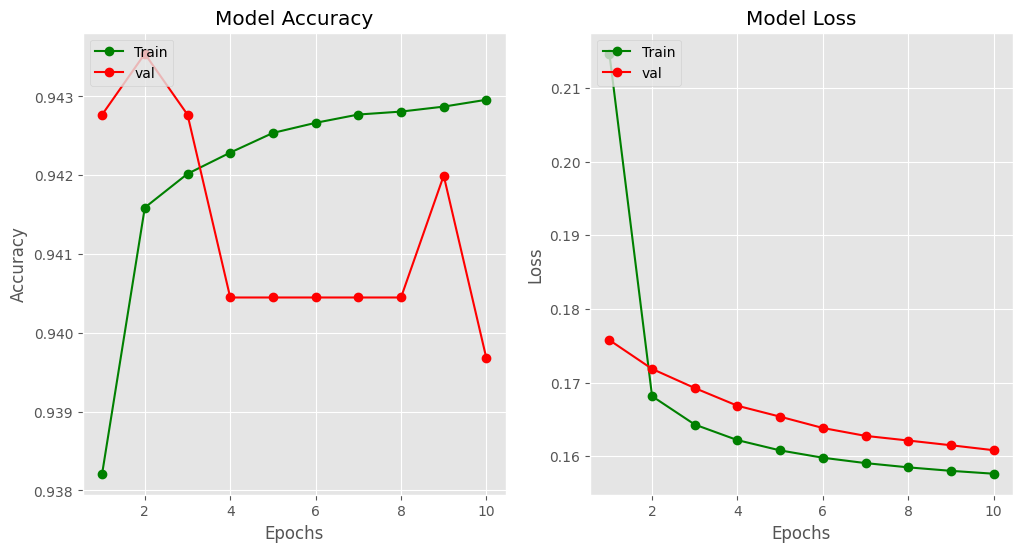

In [71]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")
#plt.show()

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()